In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Regressão Linear

In [3]:
df_reservatorio = pd.read_csv('clorofila.csv')

In [4]:
df_reservatorio.head()

,Condutividade,DO,pH,ORP,Profundidade,Temperatura,Turbidez,Clorofila
0,121.73,8.32,7.47,198.04,0.37,20.55,6.98,59.97
1,121.29,5.67,6.90,231.30,0.40,19.98,4.65,30.59
2,120.77,5.33,6.79,229.20,0.42,19.61,3.94,17.06
3,119.50,7.61,7.10,228.61,0.41,19.47,5.20,38.00
4,121.17,7.96,7.12,208.77,0.39,19.73,4.76,24.39


In [6]:
X = df_reservatorio.drop(['Clorofila'], axis=1)
Y = df_reservatorio['Clorofila']

In [7]:
X = sm.add_constant(X) 

In [8]:
modelo_linear_multiplo = sm.OLS(Y,X)
modelo_linear_multiplo = modelo_linear_multiplo.fit()

In [10]:
print(modelo_linear_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:              Clorofila   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     75.55
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.75e-74
Time:                        20:18:01   Log-Likelihood:                -1914.5
No. Observations:                 512   AIC:                             3845.
Df Residuals:                     504   BIC:                             3879.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -46.1466      7.801     -5.916

# Autocorrelação 

A Autocorrelação dos resíduos vai ser identificada pelo Termo Durbin-Watson na tabela.

In [13]:
erro_clo = Y - modelo_linear_multiplo.predict(X)

In [14]:
df_reservatorio.reset_index(inplace = True)

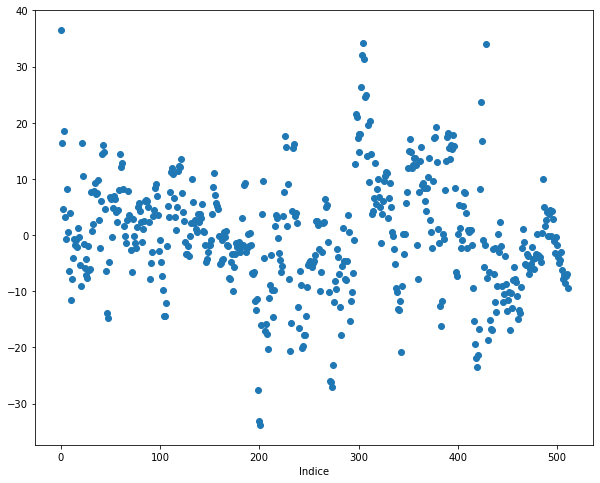

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(df_reservatorio['index'], erro_clo)
plt.xlabel('Indice')
plt.show()

Há realmente uma leve tendência. 

Analisando pelo summary acima vemos que o teste de Durbin Watson fica em 0.393 , ou seja , indica correlação positiva 

# Homocedasticidade

Vamos plotar um gráfico de resíduos versus o valor previsto.

* Ver teste de Breusch-Pagan

# Multicolinearidade

Como uma regra geral, podemos considerar um VIF > 10 alto e entender que os coeficientes das features sofrerão problemas.